# Amphi 1 - Convex Sets and Convex Functions

# 1. Convex Sets

**Definition 1.**

*A subset $K$ of $\mathbf R^n$ is called a convex set if*
$$
\forall x, y \in K, \forall \alpha \in [0,1] : \alpha  x + (1 - \alpha) y \in K
$$

# 2. Convex Functions

## 2.1 Convex Functions

**Definition 1.2a**

*Let $K \subset \mathbf R^n$ be a convex set, a function $f: \mathbf K \to [-\infty, +\infty]$ is called **convex** if*

$$
\forall x, y \in K, \forall \alpha \in [0,1]: f(\alpha x + (1-\alpha) y) \leq \alpha f(x) + (1-\alpha) f(y)
$$

**Definition 1.2b**

*Let $K \subset \mathbf R^n$ be a convex set, a function $f: \mathbf K \to [-\infty, +\infty]$ is called **strictly convex** * if
$$
\forall x\neq y \in K, \forall \alpha \in (0,1): f(\alpha x + (1-\alpha) y) < \alpha f(x) + (1-\alpha) f(y)
$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def scatter_and_annotate(plt, X, Y, names, size = 12, deltaX = 0.1, deltaY = 0.1):
    """
        deltaX, deltaY: move the annotation to the right and up
    """
    plt.scatter(X, Y)
    for x, y, n in zip(X, Y, names):
        plt.annotate(n, (x + deltaX, y + deltaY), size=size)

def f(x):
    return x**2

A = np.linspace(-1, 2, 20)
x = -1
y = 1.5
alpha = 0.4
beta = 1 - alpha
z = alpha * x + beta * y

plt.plot(A, f(A), "r")
plt.plot([x, y], [f(x), f(y),], "g")
scatter_and_annotate(plt, [x, y, z, z], [f(x), f(y), f(z), alpha * f(x) + beta * f(y)], [r"$f(x)$", r"$f(y)$", r"$f(\alpha x + (1-\alpha) y)$", r"$\alpha f(x) + (1-\alpha) f(y)$"])
plt.plot([z, z], [f(z), alpha * f(x) + beta * f(y)], '--')

## 2.2 Epigraph

**Definition 1.3**
*Let $K \subset \mathbf R^n$ be convex. The **epigraph** of a function $f: K \to [-\infty, +\infty]$ is defined by the following subset of $\mathbf R^n \times \mathbf R$ *

$$
\mathrm{epi}(f) = \{ (x, y) \in \mathbf R^n \times \mathbf R: y \geq f(x) \}
$$

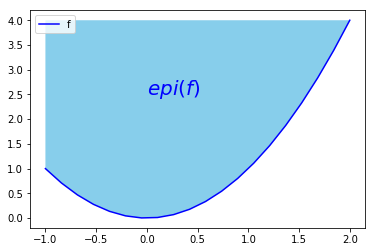

In [3]:
Y = f(A)
plt.plot(A, f(A), "b", label=r"f")
plt.fill_between(A, Y, 4, where=Y <= 4, facecolor='skyblue')
plt.annotate(r"$epi(f)$", (0, 2.5), size = 20, color="blue")
plt.legend()

**Proposition 1.4**

*Let $K \subset \mathbf R^n$ be a convex set and $f: K \to [-\infty, +\infty]$ be a function. Then $f$ is a convex set iff $\mathrm{epi} (f)$ is a convex subset of $\mathbf R^{n+1}$.*

**Proof**

($\Rightarrow$)

$f$ is convex. Let $X_1 = (x_1, y_1), X_2 = (x_2, y_2)$ in $\mathrm{epi} (f)$ and $\alpha \in [0,1]$, let 
$$
X = (x, y) := \alpha X_1 + (1-\alpha) X_2 = (\alpha x_1 + (1-\alpha) x_2, (\alpha y_1 + (1-\alpha) y_2)
$$ 
Then
$$
y = \alpha y_1 + (1-\alpha) y_2 \geq \alpha f(x_1) + (1-\alpha) f(x_2) \geq f(\alpha x_1 + (1-\alpha x_2) = f(x). 
$$
Hence $X \in \mathrm{epi} (f)$.

($\Leftarrow$)

$\mathrm{epi} (f)$ is convex. Let $x_1, x_2 \in K$, $x = \alpha x_1 + (1-\alpha) x_2$. If $f(x_1), f(x_2) < +\infty$ then $(x_1, f(x_1)), (x_2, f(x_2))$ belong to $\mathrm{epi} (f)$, hence $(x, \alpha f(x_1) + (1-\alpha) f(x_2))$ to $\mathrm{epi} (f)$ by convexity of this graph, which means 

$$
\alpha f(x_1) + (1-\alpha) f(x_2) \geq f(x)
$$

If $f(x_1)$ or $f(x_2) = +\infty$, the above inequality is evident.
This means $f$ is convex.

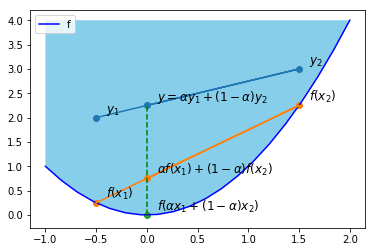

In [4]:
Y = f(A)
plt.plot(A, f(A), "b", label=r"f")
plt.fill_between(A, Y, 4, where=Y <= 4, facecolor='skyblue')
scatter_and_annotate(plt, [-0.5, 1.5, 0], [2, 3, 2.25], [r"$y_1$", r"$y_2$", r"$y = \alpha y_1 + (1-\alpha) y_2$"])
plt.plot([-0.5, 1.5, 0], [2, 3, 2.25])
scatter_and_annotate(plt, [-0.5, 1.5, 0], [f(-0.5), f(1.5), 0.75 * f(-0.5) + 0.25 * f(1.5)], [r"$f(x_1)$", r"$f(x_2)$", r"$\alpha f(x_1) + (1-\alpha) f(x_2)$"])
plt.plot([-0.5, 1.5, 0], [f(-0.5), f(1.5), 0.75 * f(-0.5) + 0.25 * f(1.5)])
scatter_and_annotate(plt, [0], [f(0)], [r"$f(\alpha x_1 + (1-\alpha) x_2)$"])
plt.plot([0, 0], [f(0), 2.25], 'g--')
plt.legend()

## 2.3 Effective Domain

**Definition 1.5**

*The effective domain of a function $f: X\subset \mathbf R^n \to [-\infty, +\infty]$ is $\mathrm dom (f) = \{x \in X : f(x) < +\infty \}$.*


For example, the function 
$$\mathbf I_{S} = \begin{cases} 0, \qquad if x \in S \\ +\infty, \qquad elsewhere \end{cases}
$$
has $\mathrm{dom} (\mathbf I_S) = S$.

## 2.4 Lower Semi-continuity

**Definition 1.6**
*A function  $f: X\subset \mathbf R^n \to [-\infty, +\infty]$ is called lower semi-continuous (lsc) at $x$ in X iff for all sequence $\{x_n\} \subset X \to x$,*
$$
f(x) \leq \lim\inf \limits_{n \to +\infty} f(x_n) 
$$

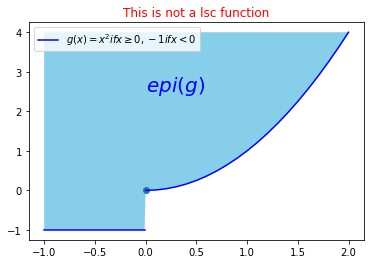

In [5]:
def g(x):
    """
    x^2 if x>=1, 0.5 elsewhere
    """
    return x**2 * (x >= 0) - 1 * (x < 0)

A_1 = np.linspace(-1, -0.01, 10)
A_2 = np.linspace(0, 2, 21)
Y_1 = g(A_1)
Y_2 = g(A_2)
A_all = list(A_1) + list(A_2)
Y_all = list(Y_1) + list(Y_2)
plt.plot(A_1, Y_1, "b", label=r"$g(x) = x^2 if x\geq 0, -1 if x < 0$")
plt.plot(A_2, Y_2, "b")
plt.fill_between(A_all, Y_all, 4, where=np.array(Y_all) <= 4, facecolor='skyblue')
plt.scatter(0, g(0))
plt.annotate(r"$epi(g)$", (0, 2.5), size = 20, color="blue")
plt.title("This is not a lsc function", color = 'red')
plt.legend()

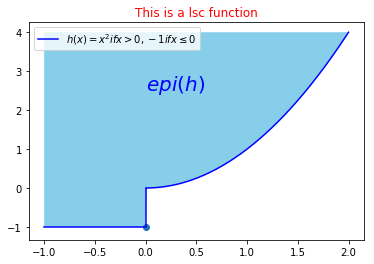

In [7]:
def h(x):
    """
    x^2 if x>0, -1 elsewhere
    """
    return x**2 * (x > 0) - 1 * (x <= 0)

A_1 = np.linspace(-1, 0, 11)
A_2 = np.linspace(0.01, 2, 200)
Y_1 = h(A_1)
Y_2 = h(A_2)
A_all = list(A_1) + list(A_2)
Y_all = list(Y_1) + list(Y_2)
plt.plot(A_1, Y_1, "b", label=r"$h(x) = x^2 if x> 0, -1 if x \leq 0$")
plt.plot(A_2, Y_2, "b")
plt.plot([0, 0], [-1, 0], "b")
plt.fill_between(A_all, Y_all, 4, where=np.array(Y_all) <= 4, facecolor='skyblue')
plt.scatter(0, h(0))
plt.annotate(r"$epi(h)$", (0, 2.5), size = 20, color="blue")
plt.title("This is a lsc function", color = 'red')
plt.legend()

**Proposition 1.7. Closeness of epigraph for functions defined on $\mathbf R^n$ **

*Let $f$ be a function $\mathbf R^n \to [-\infty, \infty]$. Then $f$ is lsc iff $\mathrm{epi} (f)$ is closed.*

**Proof**
Exercise.

**Proposition 1.8. Closeness of epigraph for functions defined on a closed subset of $\mathbf R^n$ **

*Let $f$ be a function $\mathbf X \subset R^n \to [-\infty, \infty]$. If $f$ is lsc and $\mathrm{dom} (f)$ is closed (in $\mathbf R^n$), then $\mathrm{epi} (f)$ is closed (in $\mathbf R^{n+1})$.*

**Proof**
Exercise.

## 2.5 Proper Functions

**Definition 1.7. **

*A function $f: X \subset \mathbf R^n \to [-\infty, +\infty]$. $f$ is called **proper** if $f(x) > -\infty$ for all $x \in X$ and $f(x) < +\infty$ for at least one point. In other words, if $\mathrm {epi} (f)$ is not empty and contains no vertical line. *

## 2.6 Properties

**Proposition 1.9**
	
Let $f, g: \mathbf R^n \to (-\infty, +\infty]$ be convex (resp., closed) functions, $A: \mathbf R^m \to \mathbf R^m$ a linear transformation, $a, b > 0$. Then:
- $af + bg$ is a convex (resp., closed) function $\mathbf R^n \to (-\infty, +\infty]$
- $x \mapsto f(Ax)$ is a convex (resp., closed) function $\mathbf R^m \to (-\infty, +\infty]$
	
Let $f_i (i \in I)$ ($I$ is a set of index) be a family of convex (resp., closed) functions $\mathbf R^n \to (-\infty, +\infty]$. Then $f(x) = \sup_i f_i(x)$ is a convex (resp., closed) function.

# 3 Convexity and Differentiability

## 3.1 Differentiability of First Order

**Proposition 1.10**

*Let $K$ be a convex subset of $\mathbf R^n$ and let $f$ be differentiable over $\mathbf R^n$. Then $f$ is convex (resp., strictly convex) on $K$ iff*
$$
\forall x, z \in K: f(z) - f(x) \geq f'(x) (z-x)
$$

*If the inequality in strict when $z\neq x$, then $f$ is strictly convex.*
	
**Proof**

($\Rightarrow$)

Choose $x, z$ arbitrarily in $K$.
		
Let $g(t) = f(x + t(z-x))$, then $g(0) = f(x), g(1) = f(z)$, $x + t(z-x) = tz + (1-t)x \in K$ 

If $f$ is convex on $K$ 

$g(t) = f(tz + (1-t)x) \leq tf(z) + (1-t)f(x) = g(1) + (g(1)- g(0))t$ for all $t \in [0,1]$.
That means
$$
\forall t \in (0,1): g(1) - g(0) \geq \frac{g(t) - g(0)}{t}
$$
Taking limits when $t \to 0$ ($g$ is differentiable at 0 because $f$ is at $x$), we get
$$
g(1) - g(0) \geq g'(0)
$$
Note that $g'(t) = (z-x)f'(x + t(z-x))$, hence $g'(0) = (z-x) f'(x)$. The above inequality becomes:
$$
f(z) - f(x) \geq (z-x)f'(x)
$$
	
($\Leftarrow$)

Let $x, y \in K$, $\alpha \in (0,1)$ and $z = \alpha x + (1-\alpha) y$. We have $z\in K$ Then
$$
\alpha f(x) + (1-\alpha) f(y) - f(z) = \alpha (f(x) - f(z)) + (1-\alpha) (f(y) - f(z))
$$

$$
\geq \alpha (x - z)f'(z) + (1-\alpha)(y - z)f'(z) = 0
$$

This means 
$$
\alpha f(x) + (1-\alpha) f(y) \geq f(\alpha x + (1-\alpha) y)
$$

Hence $f$ is convex on $K$.
For strict convexity, just repeat the argument with $x\neq y$ and $>$ instead of $\geq$. 

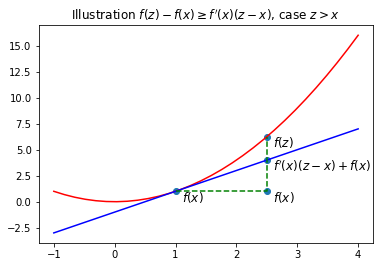

In [8]:
def f(x):
    return x**2

def tangent(x):
    return 2*x - 1

A = np.linspace(-1, 4, 30)

plt.plot(A, f(A), "r", A, tangent(A), "b")
scatter_and_annotate(plt, [1, 2.5, 2.5, 2.5], [tangent(1), tangent(2.5), f(2.5), 1], ["$f(x)$", "$f'(x)(z-x) + f(x)$", "$f(z)$", "$f(x)$"], deltaY = -1)
plt.plot([1, 2.5, 2.5], [1, 1, f(2.5)], "g--")
plt.title(r"Illustration $f(z)-f(x) \geq f'(x)(z-x)$, case $z > x$")
plt.show()

This is equivalent to saying that the tangent is always beneath the graph.

**Proposition 1.11**
	
*Let $K \in \mathbf R^n$ be a convex set, $f$ be a convex function differentiable over an open set containing $K$, then $x^\star \in K$ is a minimizer of $f$ on $K$ iff*

$$
\forall x \in K, f'(x^\star) (x - x^\star) \geq 0
$$
	
**Proof**

$(\Rightarrow)$
	
If 
$$
f'(x^\star) (x - x^\star) < 0
$$
for some $x \in K$. We have
$$
f'(x^\star) (x - x^\star) = \lim_{t \to 0+} \frac{f(x^\star + \alpha (x - x^\star)) - f(x^\star)}{\alpha} < 0
$$
Hence $f(x^\star + \alpha (x - x^\star)) - f(x^\star) < 0$ in a sufficiently small neighborhood of $x^\star$ in $K$, contradicts the minimality of $x^\star$.
	
$ (\Leftarrow)$

If 
$$
\forall x \in K, f'(x^\star) (x - x^\star) \geq 0
$$
then 
$$
f(x^\star) \leq f(x^\star) + f'(x^\star) (x - x^\star) \leq f(x) 
$$
(by proposition 1.8)
Hence $x^\star$ is a minimizer of $f$ on $K$.
	

## 3.2 Projection

**Proposition 1.12**

*Let $K$ be a convex, closed subset of $\mathbf R^n$. For any $z \in \mathbf R^n$, there exists a unique $x^\star \in K$ that minimizes $\Vert x - z\Vert^2$. $x^\star$ is called the projection of $z$ on $K$ (we write $x = p_K(z)$. It is the only point  $x$ that satisfies*
$$
\forall y \in K : (z - x)\cdot (y - x) \leq 0
$$ 

**Proof**

As $K$ is closed, there exists $x^\star \in K$ that minimizes $f(x) = \Vert x - z \Vert^2$. By proposition 1.11
$$
\forall x \in K: f'(x^\star) \cdot (x -x^\star) \geq 0
$$
i.e
$$
\forall x \in K: (x^\star - z)\cdot(x - x^\star) \geq 0
$$
For the uniqueness, if $x^{\star\star}$ is also a projection of $z$, choose $x = x^\star$ and then $x=x^{\star \star}$
$$
 (z - x^\star)\cdot (x^{\star\star} - x^\star) \leq 0, (z - x^{\star\star})\cdot (x^\star - x^{\star\star}) \leq 0
$$
Adding side by side
$$
\Vert x^\star - x^{\star\star}\Vert^2 \leq 0
$$
Donc, $x^\star = x^{\star\star}$

## 3.3 Twice Differentiability

**Proposition 1.13**

# 4. Separation

## 4.1 Proper Separation and Strong Separation

**Definition 1.14**

*Let $A, B \subset \mathbf R^n$*

* A hyperplane $H : \{ x\in \mathbf R^n : w \cdot x = b\}$ is said to **properly separate** $A$ and $B$ if*

$$
\forall x \in A: w \cdot x \geq b
$$

$$
\forall x \in B: w \cdot x \leq b
$$

(or vice versa)
* A hyperplane $H : \{ x\in \mathbf R^n : w \cdot x = b\}$ is said to **strongly separate** $A$ and $B$ if there exists a $delta > 0$ such that*

$$
\forall x \in A: w \cdot x \geq b + \delta
$$

$$
\forall x \in B: w \cdot x \leq b - \delta
$$

(or vice versa)

## 4.2 Strong Separation Between a Point and a Closed, Convex Set

**Proposition 1.15**

*Let $K \subset \mathbf R^n$ be a non-empty closed, convex set and $z$ be a point that lies outside of $K$. Then there exists a hyperplane $H$ that strongly separates $\{z\}$ and $K$.*

**Proof**

Let $p = p_K(z)$, $w = z - p$

Then for $y \in K$, by proposition 1.12, we have
$$
(z - p)\cdot (y - p) \leq 0
$$

or
$$
w \cdot y \leq w \cdot p
$$

while
$$
w \cdot z = w \cdot p + w \cdot (z - p) = w \cdot p + \Vert w \Vert^2
$$

Choose $b = w \cdot p + \frac12 \Vert w \Vert^2$ and $\delta = \frac12 \Vert w \Vert^2$, $w \cdot x = b$ strongly separates $\{z\}$ and $K$ by definition.

**Corollary 1.16**

*Let $K \subset \mathbf R^n$ be a non-empty convex set and $z$ be a point that lies outside of $K$, then there exists $w \in \mathbf R^n$ such that*
$$
\forall y \in K: w \cdot y < w \cdot z
$$

(Just choose $w = z - p_K(z)$)

## 4.3 Supporting Hyperplane

**Proposition 1.17**

*Let $K \subset \mathbf R^n$ be a non-empty convex set and $z$ be a point that lies on the **boundary** of $K$. Then there exists a hyperplane $H$ that properly separates $z$ and $K$.*

**Proof**

Let $y$ be some point of $K$.

Let $(z_n)$ be a sequence of points that lie outside of $K$ and tends to $z$. As $z_n$ lies outside of $K$, there exists $w_n \in \mathbf R^n$ such that 

$$
w_n \cdot y < w_n \cdot z_n
$$

Let $u_n = w_n / \Vert w_n \Vert$. Divide both side by $\Vert w_n \Vert$ we have
$$
u_n \cdot y < u_n \cdot z_n 
$$

As $(u_n)$ is a sequence of points in the compact set $S_1 = \Vert x \Vert = 1$, there exists a subsequence of $(u_n)$ that tends to $u \in S_1$. Taking limits on this subsequence, we have

$$
u \cdot y \leq u \cdot z
$$

Choose $w = u$, $b = u \cdot z$, we have
$$
w \cdot y \leq b 
$$

and
$$
w \cdot z = b
$$

As $y$ is chosen arbitrarily, by definition, $w \cdot x = b$ properly separates $K$ and $\{ z \}$.

# 5. Subdifferential

## 5.1 Subdifferential

**Definition 1.18**

*Let $f: \mathbf R^n \to [-\infty, +\infty]$, $x \in \mathrm{dom}(f)$. A vector $\phi \in \mathbf R^n$ is called a subgradient of $f$ at $x$ if*

$$
\forall y \in \mathbf R^n, f(y) - f(x) \geq (y - x) \cdot \phi 
$$

*The **subdifferential** of $f$ at $x$, denoted by $\partial f(x)$, is the set of all subgradient of $f$ at $x$.*

*By convention, if $x \notin \mathrm{dom} (f)$, $\partial f(x) = \emptyset$.*

**Examples**

Let $f(x) = |x|$ ($\mathbf R \to \mathbf R$) then $\phi \in \partial f(x)$ iff
$$
\forall y \in \mathbf R, |y| - |x| \geq (y - x) \phi
$$

If $x \neq 0$, let $k = y/x - 1$, the above equality is equivalent to
$$
\forall k \in \mathbf R, k|x| \geq k\phi x
$$

If $x > 0$, we have $kx (1-\phi) \geq 0$ for all $k \in \mathbf R$. This is true iff $\phi = 1$. 
If $x < 0$, we have $kx (1+\phi) \geq 0$ for all $k \in \mathbf R$. This is true iff $\phi = -1$.
If $x = 0$, $\phi \in \partial f(x)$ iff
$$
\forall y \in \mathbf R, |y| \geq y \phi
$$
This is true iff $\phi \in [-1, 1]$.

Hence

$$
\partial f(x) = \begin{cases}
\{1\},  x > 0 \\
\{-1\}, x < 0 \\
[-1, 1], x = 0 \\
\end{cases}
$$




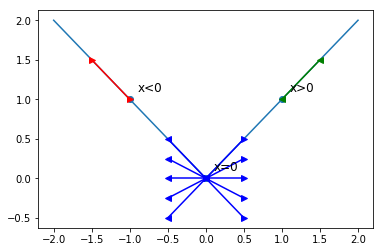

In [10]:
def f(x):
    return abs(x)

A = np.linspace(-2, 2, 41)
plt.plot(A, f(A))
scatter_and_annotate(plt, [-1, 0, 1], [f(-1), f(0), f(1)], ["x<0", "x=0", "x>0"])
plt.plot([-1, -1.5], [f(-1), f(-1.5)], 'r->')
plt.plot([1, 1.5], [f(1), f(1.5)], 'g-<')
plt.plot([0, -0.5], [f(0), 1 * f(-0.5)], 'b-<')
plt.plot([0, -0.5], [f(0), 0.5 * f(-0.5)], 'b-<')
plt.plot([0, -0.5], [f(0), 0 * f(-0.5)], 'b-<')
plt.plot([0, -0.5], [f(0), -0.5 * f(-0.5)], 'b-<')
plt.plot([0, -0.5], [f(0), -1 *f(-0.5)], 'b-<')
plt.plot([0, 0.5], [f(0), -1 * f(0.5)], 'b->')
plt.plot([0, 0.5], [f(0), -0.5 * f(0.5)], 'b->')
plt.plot([0, 0.5], [f(0), 0 * f(0.5)], 'b->')
plt.plot([0, 0.5], [f(0), 0.5 * f(0.5)], 'b->')
plt.plot([0, 0.5], [f(0), 1 * f(0.5)], 'b->')

## 5.2 Relative Interior

**Definition 1.19**

*Let $X \in \mathbf R^n$. The relative interior of $C$, denoted by $\mathrm{relint} X$, is the interior of $X$ with respect to the smallest affine space that contains $X$.*

**Proposition 1.20**

*If $K \in \mathbf R^n$ is a non-empty convex set, then $\mathrm{relint} X \neq \emptyset$*

**Proof**
Exercise.

## 5.3 Non-emptyness of Subdifferential of Convex Function

**Proposition 1.21**

*Let $f: \mathbf R^n \to [-\infty, +\infty]$ be a convex function and $x \in \mathrm{relint} (\mathrm {dom} (f))$. Then $\partial f (x)$ is non-empty.*

**Proof**

Let $x_0 \mathrm{relint}(\mathrm{dom} (f))$. If $f(x_0) = -\infty$, we have

$$
\forall \phi \in \mathbf R^n, \forall y \in \mathbf R^n:  f(y) - f(x) = +\infty \geq \phi \cdot (y - x)
$$

Hence $\partial f(x_0) = \mathbf R^n$.

If $f(x_0) > -\infty$, by replacing $f$ by $x \mapsto f(x + x_0) - f(x_0)$, we can suppose that $x_0 = 0$ and $f(x_0) = 0$. For all $\phi \in \mathbf R^n$, we have

$$
\phi \in \partial f(0) \Leftrightarrow \forall x \in \mathbf R^n, \phi \cdot x \leq f(x) 
$$

$$
\Leftrightarrow \forall x \in \mathrm {dom}(f), \phi \cdot x \leq f(x)
$$

Let $\mathcal A$ be the smallest affine space containing $\mathrm{dom}(f)$. Then $\mathcal A$ contains the origin, so it is an Euclidean vector space. Let $C$ be the closure of $\mathrm{epi}(f) \cap (\mathcal A \times \mathbf R)$. The set $C$ is a convex closed set in $\mathcal A \in \mathbf R$, endowed with the scalar product $(x, u) \cdot (x', u') = x\cdot x' + uu'$. The pair $(0, 0) = (x_0, f(x_0))$ belongs to the boundary of $C$, so by proposition 1.17 in $\mathcal A \times \mathbf R$, there is a vector $w \in \mathcal A \times \mathbf R$ such that

$$
\forall z \in C, w \cdot z \leq 0
$$

Write $w = (\phi, u) \in \mathcal A \in \mathbf R$. For $z = (x, t) \in C$, we have
$$
\phi \cdot x + ut \leq 0
$$

Let $x \in \mathrm {dom} (f)$ (that means $f(x) < \infty$) and for all $t \geq f(x)$, $(x, t) \in C$. Thus,
$$
\forall x\in \mathrm{dom} (f), \forall t \geq f(x), \phi \cdot x + ut \leq 0.
$$

Let $t$ tend to $+\infty$, we obtain $u \leq 0$ 

Suppose by contradiction that $u = 0$, then $\phi \cdot x \leq 0$ for all $x \in \mathrm{dom}(f)$. As $0 \in \mathrm{relint}(\mathrm{dom}(f))$, there is a set $V$ open in $\mathcal A$ such that $0 \in V \subset \mathrm{dom}(f)$. For $x\in \mathcal A$, there is an $\epsilon > 0$ such that $\epsilon x \in V$. As $\phi \cdot x + ut \leq 0 \forall x\in \mathrm{dom}(f), \forall t \geq f(x)$, we have $\phi \cdot \epsilon x \leq 0$, so $\phi \cdot x \leq 0$. Similarly $\phi \cdot -x \leq 0$. Therefore $\phi \cdot x \equiv 0$ on $\mathcal A$. Since $\phi \in \mathcal A$, $\phi = 0$ as well, so $w = 0$, contradiction !

Therefore, $u < 0$. Dividing by $-u$, we have

$$
\forall x \in \mathrm{dom}(f), \forall t \geq f(x), \frac{-1}u \phi \cdot x \leq f(x)
$$

So $\frac{-1}u \phi \in \partial f(0)$.

## 5.4 Differentiable Case

**Proposition 1.22**

*Let $f: \mathbf R^n \to (-\infty, +\infty]$ be a convex function, differentiable at $x$. Then $\partial f(x) = \{ f'(x) \}$.*

**Proof**

If $f$ is differentiable at $x$ then $x$ belongs to $\mathrm{int}(\mathrm{dom} (f))$. Let $\phi \in \partial f(x)$ and $t \neq 0$. Then for all $y \in \mathrm{dom}(f), f(y) - f(x) \geq \phi \cdot (y - x)$. Choose $y = x + t(\phi - f'(x))$ which belongs to $\mathrm{dom}(f)$ for $t$ small enough, we have

$$
\frac {f(x + t(\phi - f'(x)) - f(x)}t \geq \phi \cdot (\phi - f'(x))
$$

The left term converges to 
$$
(f'(x) - \phi) \cdot (\phi - f'(x)) \geq 0
$$

So $\phi = f'(x)$.

## 5.5 Fermat's Rule

A point $x$ is called a minimizer of $f$ if $f(x) \leq f(y)$ for all $y \in \mathbf R^n$. The set of minimizers of $f$ is denoted by $\arg \min (f)$ 

**Proposition 1.23**

*Let $f: \mathbf R^n \to (-\infty, +\infty]$. $x \in \arg\min f \Leftrightarrow 0 \in \partial f(x)$.*

**Proof**
$$
x\in \arg\min f \Leftrightarrow \forall y \in \mathbf R^n, f(y) \geq f(x) \Leftrightarrow \forall y \in \mathbf R^n, f(y) - f(x) \geq 0 \cdot (y - x) \Leftrightarrow 0 \in \arg\min f 
$$

**Corollary 1.24**

Let $f: \mathbf R^n \to (-\infty, +\infty]$ be a convex function, differential at $x$. Then $x \in \arg\min f \Leftrightarrow f'(x) = 0.$*

**Proposition 1.25**

*Let x be a local minimum of a convex function $f$, then $x$ is a global minimizer.*

**Proof**

By hypothesis, there exists an open ball $V \subset \mathbf R^n$ such that $x \in V$ and for $u \in V$, $f(x) \leq f(u)$.

Let $t$ small such that $u = x + t(y-x) \in V$, then

$$
f(u) \leq tf(y)+(1-t)f(x)
$$

That means
$$
f(y) \geq \frac1t f(u) - \frac{1-t}t f(x) \geq f(x)
$$.

So $x$ is a global minimizer.